In [2]:
import pandas as pd
import re
import numpy as np
import os
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [3]:
from nltk.tokenize import sent_tokenize
import spacy
from spacy.lang.fr.stop_words import STOP_WORDS
import string
from textblob import Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
import plotly.graph_objects as go
import plotly.express as px

In [4]:
df=pd.read_json("data_3000.json")
#df.head(20)
tittle_1=df['title'][0]
tittle_=tittle_1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2868 entries, 0 to 2867
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    2868 non-null   object
 1   details  2868 non-null   object
dtypes: object(2)
memory usage: 44.9+ KB


In [5]:
#title_0=df['title'][0]
df['title']=df['title'].astype('str') 
df['details']=df['details'].astype('str') #date
#df['date']=df['date'].astype('str')

def clean_data(text):
    for ch in ['','\ufeff','\u200b','\""','.',',','%','\\','`','«', '_','{','}','[',']','(',')','>','#','+','-','!','$','\'','/','»',':','“','”','xa0','""','1','2','3','4','5','6','7','8','9','0','?','!','’']:
        if ch in text:
            text = text.replace(ch,"")         
    return text




def clean_scraped_data():
    for j in range(0,2867):
        df['title'][j]=clean_data(df['title'][j])
        df['details'][j]=clean_data(df['details'][j])
        #df['date'][j]=clean_data(df['date'][j])
         
     
    return df                     


df=clean_scraped_data()
df
    

,title,details
0,Covid morts la baisse se poursuit dans les s...,Le nombre de malades du Covid dans les service...
1,Covid un essai lancé en France sur linterchan...,Une dose de Moderna puis une dose de Pfizer Bi...
2,Covid malgré son retard initial la France fai...,Après des débuts difficiles la campagne vaccin...
3,Covid vaccinodrome cherche vaccinateurs le jo...,Après une campagne de recrutement organisée pa...
4,Covid la baisse des hospitalisations se poursuit,Le nombre de malades du Covid à lhôpital servi...
...,...,...
2863,"Vaccin en France ""il est très difficile de sa...",Alors que la campagne française de vaccination...
2864,Succès inattendu pour les stations de ski malg...,Neige abondante soleil Lors des vacances de No...
2865,Covid comment les Français concernés par le c...,Pas moins de six millions de Français de lest ...
2866,Covid vaccination à grande échelle à Pékin av...,Plus de Pékinois ont été vaccinés contre le c...


In [6]:
data=  pd.DataFrame()
data['text'] = df['title'] + " " + df['details']
#df = df.drop([ 'date'],axis=1)

In [7]:
#text="" # data sous forme text (one string)
#with open('data_cleaned_.txt', 'w') as f:
  #  for i in range(0,2867):
   #     text=text+str(data['text'][i])
    #    f.write(str(data['text'][i]))       

In [8]:
data['text']

0       Covid   morts la baisse se poursuit dans les s...
1       Covid  un essai lancé en France sur linterchan...
2       Covid  malgré son retard initial la France fai...
3       Covid  vaccinodrome cherche vaccinateurs le jo...
4       Covid  la baisse des hospitalisations se pours...
                              ...                        
2863    Vaccin  en France "il est très difficile de sa...
2864    Succès inattendu pour les stations de ski malg...
2865    Covid  comment les Français concernés par le c...
2866    Covid  vaccination à grande échelle à Pékin av...
2867    Covid-19 : le vaccin de Moderna va être autori...
Name: text, Length: 2868, dtype: object

### Data pre-processing

In [9]:
# Step - a : Remove blank rows if any.
data['text'].dropna(inplace=True) 



In [10]:
# Step - b : Change all the text to lower case. This is required as python interprets 'dog' and 'DOG' differently
data['text'] = [entry.lower() for entry in data['text']]

In [11]:
# Step - c : Tokenization : In this each entry in the corpus will be broken into set of words
data['text']= [word_tokenize(entry) for entry in data['text']]

In [12]:
for i in range(0,2867):
    mytxt=""
    mytxt=str(data['text'][i])
print(data['text'])

0       [covid, morts, la, baisse, se, poursuit, dans,...
1       [covid, un, essai, lancé, en, france, sur, lin...
2       [covid, malgré, son, retard, initial, la, fran...
3       [covid, vaccinodrome, cherche, vaccinateurs, l...
4       [covid, la, baisse, des, hospitalisations, se,...
                              ...                        
2863    [vaccin, en, france, ``, il, est, très, diffic...
2864    [succès, inattendu, pour, les, stations, de, s...
2865    [covid, comment, les, français, concernés, par...
2866    [covid, vaccination, à, grande, échelle, à, pé...
2867    [covid-19, :, le, vaccin, de, moderna, va, êtr...
Name: text, Length: 2868, dtype: object


In [13]:
from spacy.lang.fr.stop_words import STOP_WORDS as fr_stop

final_stopwords_list = list(fr_stop) 


In [14]:
import spacy
from spacy.lang.fr.examples import sentences 
import fr_core_news_md
from spacy.lang.en import English     
##-----------
nlp = spacy.load('fr_core_news_md')     
##-----------
for index,entry in enumerate(data['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        # 
        if word not in final_stopwords_list and word.isalpha():
            #word_Final = word_Lemmatized.lemmatize(word)
            word_Final = word
            #steaming
            doc = nlp(str(word_Final)) 
            for token in doc:
                word_Final =  token.lemma_
            
            #word_Final=stemming(word_Final)
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    data.loc[index,'text_final'] = str(Final_words)

In [15]:
data['text_final']# dataframe removed stopword , applied  steaming !

0       ['covid', 'mort', 'baisse', 'poursuivre', 'ser...
1       ['covid', 'essai', 'lancer', 'france', 'linter...
2       ['covid', 'malgré', 'retard', 'initial', 'fran...
3       ['covid', 'vaccinodrome', 'cherche', 'vaccinat...
4       ['covid', 'baisse', 'hospitalisation', 'poursu...
                              ...                        
2863    ['vaccin', 'france', 'très', 'difficile', 'sav...
2864    ['succès', 'inattendu', 'station', 'ski', 'mal...
2865    ['covid', 'français', 'concerner', 'couvrefeu'...
2866    ['covid', 'vaccination', 'grand', 'échell', 'p...
2867    ['vaccin', 'moderna', 'autoriser', 'heure', 'j...
Name: text_final, Length: 2868, dtype: object

### ------------------ End of data cleaning & NLP -----------------------------   

**Sentiment Analysis with TextBlob**

In [16]:
data['text_final']

0       ['covid', 'mort', 'baisse', 'poursuivre', 'ser...
1       ['covid', 'essai', 'lancer', 'france', 'linter...
2       ['covid', 'malgré', 'retard', 'initial', 'fran...
3       ['covid', 'vaccinodrome', 'cherche', 'vaccinat...
4       ['covid', 'baisse', 'hospitalisation', 'poursu...
                              ...                        
2863    ['vaccin', 'france', 'très', 'difficile', 'sav...
2864    ['succès', 'inattendu', 'station', 'ski', 'mal...
2865    ['covid', 'français', 'concerner', 'couvrefeu'...
2866    ['covid', 'vaccination', 'grand', 'échell', 'p...
2867    ['vaccin', 'moderna', 'autoriser', 'heure', 'j...
Name: text_final, Length: 2868, dtype: object

In [17]:
type(data["text_final"])

pandas.core.series.Series

In [18]:
senti_list = []
for i in data["text_final"]:
    vs = tb(i).sentiment[0]
    if (vs > 0):
        senti_list.append('Positive')
    elif (vs < 0):
        senti_list.append('Negative')
    else:
        senti_list.append('Neutral')  

In [19]:
data["sentiment"]=senti_list
data

,text,text_final,sentiment
0,"[covid, morts, la, baisse, se, poursuit, dans,...","['covid', 'mort', 'baisse', 'poursuivre', 'ser...",Negative
1,"[covid, un, essai, lancé, en, france, sur, lin...","['covid', 'essai', 'lancer', 'france', 'linter...",Positive
2,"[covid, malgré, son, retard, initial, la, fran...","['covid', 'malgré', 'retard', 'initial', 'fran...",Positive
3,"[covid, vaccinodrome, cherche, vaccinateurs, l...","['covid', 'vaccinodrome', 'cherche', 'vaccinat...",Neutral
4,"[covid, la, baisse, des, hospitalisations, se,...","['covid', 'baisse', 'hospitalisation', 'poursu...",Negative
...,...,...,...
2863,"[vaccin, en, france, ``, il, est, très, diffic...","['vaccin', 'france', 'très', 'difficile', 'sav...",Negative
2864,"[succès, inattendu, pour, les, stations, de, s...","['succès', 'inattendu', 'station', 'ski', 'mal...",Positive
2865,"[covid, comment, les, français, concernés, par...","['covid', 'français', 'concerner', 'couvrefeu'...",Positive
2866,"[covid, vaccination, à, grande, échelle, à, pé...","['covid', 'vaccination', 'grand', 'échell', 'p...",Positive


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data["text"], data["sentiment"], test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 2581
# Test data samples: 287


In [21]:
NB_WORDS = 10000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

In [22]:
import collections
tk = Tokenizer(num_words=NB_WORDS,
               filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 2581 documents
10000 words in dictionary
Top 5 most common words are: [('de', 9084), ('la', 5121), ('le', 4712), ('les', 4263), ('à', 3158)]


In [23]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

print('"{}" is converted into {}'.format(X_train[0], X_train_seq[0]))

"['covid', 'morts', 'la', 'baisse', 'se', 'poursuit', 'dans', 'les', 'services', 'de', 'réanimation', 'le', 'nombre', 'de', 'malades', 'du', 'covid', 'dans', 'les', 'services', 'de', 'réanimation', 'a', 'poursuivi', 'sa', 'baisse', 'mardi', 'ainsi', 'que', 'le', 'total', 'des', 'hospitalisations', 'au', 'plus', 'bas', 'depuis', 'six', 'mois', 'selon', 'les', 'chiffres', 'de', 'santé', 'publique', 'france', 'les', 'services', 'de', 'soins', 'critiques', 'comptent', 'désormais', 'patients', 'contre', 'la', 'veille']" is converted into [3, 808, 1, 1513, 6, 21, 1, 152, 1400, 85, 339, 932, 7, 285, 6494, 1, 1227, 3, 808, 1, 1513, 18, 17, 300, 2988, 6, 21, 2588, 6, 189, 152, 1400, 20, 339, 5, 64, 682, 253, 1, 22, 1034, 34, 35, 847, 184, 15, 208, 1, 59]


In [24]:
def one_hot_seq(seqs, nb_features = NB_WORDS):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

"[3, 808, 1, 1513, 6, 21, 1, 152, 1400, 85, 339, 932, 7, 285, 6494, 1, 1227, 3, 808, 1, 1513, 18, 17, 300, 2988, 6, 21, 2588, 6, 189, 152, 1400, 20, 339, 5, 64, 682, 253, 1, 22, 1034, 34, 35, 847, 184, 15, 208, 1, 59]" is converted into [0. 1. 0. ... 0. 0. 0.]
For this example we have 35.0 features with a value of 1.


In [25]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

"Negative" is converted into 2
"2" is converted into [0. 0. 1.]


In [26]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

Shape of validation set: (259, 10000)


### Deep learning

In [27]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(3, activation='softmax'))
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640064    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [28]:
def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])
    
    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)
    
    return history

In [29]:
base_history = deep_model(base_model)

In [30]:
%matplotlib inline
from matplotlib import pyplot as plt

def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

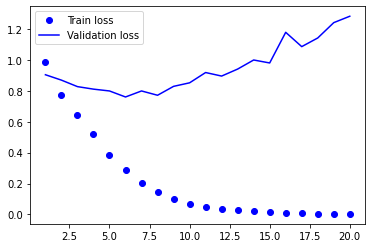

In [31]:
eval_metric(base_history, 'loss')

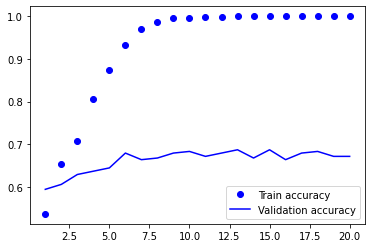

In [32]:
eval_metric(base_history, 'accuracy')

In [33]:
reduced_model = models.Sequential()
reduced_model.add(layers.Dense(32, activation='relu', input_shape=(NB_WORDS,)))
reduced_model.add(layers.Dense(3, activation='softmax'))
reduced_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 320,131
Trainable params: 320,131
Non-trainable params: 0
_________________________________________________________________


In [34]:
reduced_history = deep_model(reduced_model)

In [35]:
def compare_loss_with_baseline(h, model_name):
    loss_base_model = base_history.history['val_loss']
    loss_model = h.history['val_loss']

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, loss_base_model, 'bo', label='Validation Loss Baseline Model')
    plt.plot(e, loss_model, 'b', label='Validation Loss ' + model_name)
    plt.legend()
    plt.show()

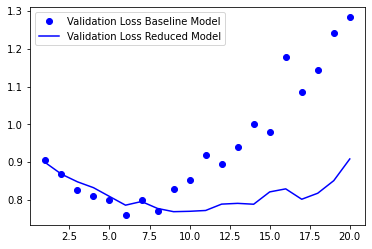

In [36]:
compare_loss_with_baseline(reduced_history, 'Reduced Model')

In [37]:
reg_model = models.Sequential()
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(NB_WORDS,)))
reg_model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
reg_model.add(layers.Dense(3, activation='softmax'))
reg_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                640064    
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [38]:
reg_history = deep_model(reg_model)

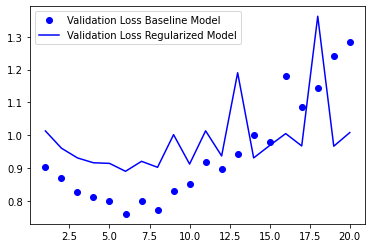

In [39]:
compare_loss_with_baseline(reg_history, 'Regularized Model')

In [40]:
drop_model = models.Sequential()
drop_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(64, activation='relu'))
drop_model.add(layers.Dropout(0.5))
drop_model.add(layers.Dense(3, activation='softmax'))
drop_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                640064    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 3)                 195       
Total params: 644,419
Trainable params: 644,419
Non-trainable params: 0
_________________________________________________________________


In [41]:
drop_history = deep_model(drop_model)

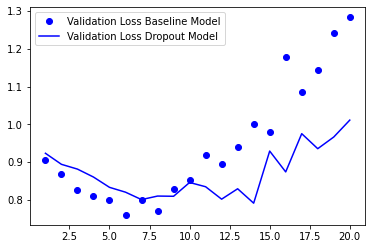

In [42]:
compare_loss_with_baseline(drop_history, 'Dropout Model')

In [43]:
def test_model(model, epoch_stop):
    model.fit(X_train_oh
              , y_train_oh
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test_oh, y_test_oh)
    
    return results

In [44]:
base_results = test_model(base_model, 4)
print('/n')
print('Test accuracy of baseline model: {0:.2f}%'.format(base_results[1]*100))

9/9 [==============================] - 0s 2ms/step - loss: 1.0153 - accuracy: 0.7073
/n
Test accuracy of baseline model: 70.73%


In [45]:
reduced_results = test_model(reduced_model, 10)
print('/n')
print('Test accuracy of reduced model: {0:.2f}%'.format(reduced_results[1]*100))

9/9 [==============================] - 0s 1ms/step - loss: 0.8832 - accuracy: 0.7143
/n
Test accuracy of reduced model: 71.43%


In [46]:
reg_results = test_model(reg_model, 5)
print('/n')
print('Test accuracy of regularized model: {0:.2f}%'.format(reg_results[1]*100))

9/9 [==============================] - 0s 2ms/step - loss: 0.9607 - accuracy: 0.7038
/n
Test accuracy of regularized model: 70.38%


In [47]:
drop_results = test_model(drop_model, 6)
print('/n')
print('Test accuracy of dropout model: {0:.2f}%'.format(drop_results[1]*100))

9/9 [==============================] - 0s 2ms/step - loss: 1.0220 - accuracy: 0.7213
/n
Test accuracy of dropout model: 72.13%
